In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

%matplotlib inline
!pwd

/c/HDD/Courses/gitRepos/MNIST-CNN-TF/MNIST-CNN-TF


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

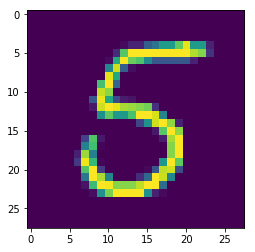

In [3]:
plt.imshow(x_train[768,:,:])

In [4]:
wd = !pwd
print(str(wd[0][2:]))

/HDD/Courses/gitRepos/MNIST-CNN-TF/MNIST-CNN-TF


In [5]:
with tf.device('/gpu:0'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    tensorboard = TensorBoard(log_dir=r"logs\{}".format(time()))

    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard])
    model.evaluate(x_test, y_test)

W0705 02:55:00.533536 28564 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2187 - accuracy: 0.9352
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0970 - accuracy: 0.9704
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0684 - accuracy: 0.9782
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0538 - accuracy: 0.9832
Epoch 5/5
10000/10000 [==============================] - 0s 46us/sample - loss: 0.0646 - accuracy: 0.9813


In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.0646 - accuracy: 0.9813


[0.0645874617558904, 0.9813]

In [7]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(v_xs, v_ys):
    cls_true = v_ys
    cls_pred = np.argmax(model.predict(v_xs), axis=1).T
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    plt.figure()
#     plt.subplot(121)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Print the confusion matrix as text.
#     print(cm)
    # Plot the confusion matrix as an image.

10000/10000 [==============================] - 0s 38us/sample
prediction for this image: 8


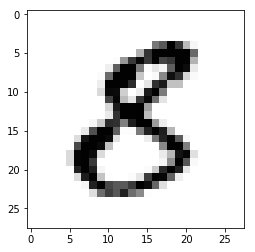

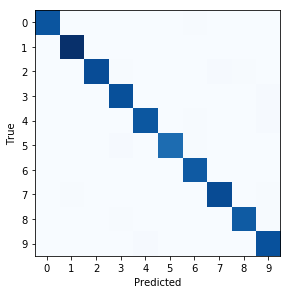

In [8]:
img_no = 1234

plt.figure()
plt.imshow(x_test[img_no,:,:], cmap='Greys')
pred = np.argmax(model.predict(x_test, batch_size=None, verbose=1), axis=1)[img_no]
print("prediction for this image: {}".format(pred))

print_confusion_matrix(x_test, y_test.reshape((-1, 1)))